In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
#crashes_df = pd.read_csv("data/nyc_mv_crash_data_truncated2.csv")
crashes_df = pd.read_csv("data/nyc_mv_crash_data_truncated4.csv")

# Display sample data
crashes_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/2021,2:39,NaN,NaN,NaN,2.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1,3/26/2022,11:45,NaN,NaN,NaN,1.0,0.0,Sedan,NaN,NaN,NaN,NaN
2,6/29/2022,6:55,NaN,NaN,NaN,0.0,0.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,0.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,9/8/2016,14:00,BRONX,40.820297,-73.854645,0.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1048571,8/23/2016,16:55,NaN,40.692722,-73.968750,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1048572,9/11/2016,14:45,NaN,40.733430,-73.868890,0.0,0.0,Sedan,Sedan,NaN,NaN,NaN
1048573,9/9/2016,17:00,NaN,40.770065,-73.959274,0.0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [3]:
brooklyn_df = crashes_df[crashes_df['BOROUGH'] == 'BROOKLYN']
brooklyn_count = brooklyn_df['BOROUGH'].count()

bronx_df = crashes_df[crashes_df['BOROUGH'] == 'BRONX']
bronx_count = bronx_df['BOROUGH'].count()

manhattan_df = crashes_df[crashes_df['BOROUGH'] == 'MANHATTAN']
manhattan_count = manhattan_df['BOROUGH'].count()

staten_df = crashes_df[crashes_df['BOROUGH'] == 'STATEN ISLAND']
staten_count = staten_df['BOROUGH'].count()

queens_df = crashes_df[crashes_df['BOROUGH'] == 'QUEENS']
queens_count = queens_df['BOROUGH'].count()

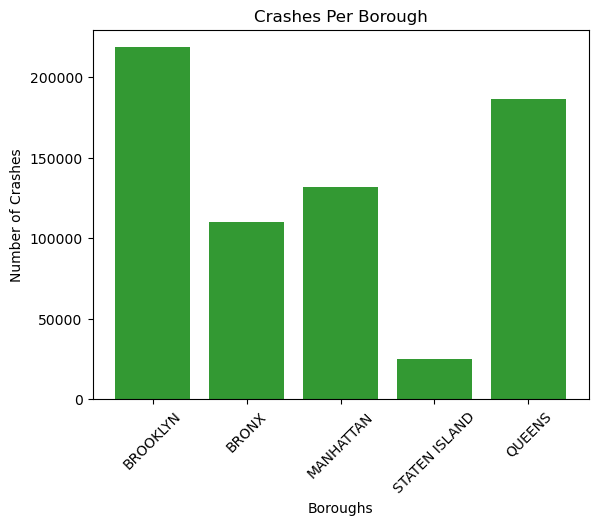

In [4]:
boroughs_df = [brooklyn_count, bronx_count, manhattan_count, staten_count, queens_count]
x_axis = ['BROOKLYN','BRONX','MANHATTAN','STATEN ISLAND','QUEENS']
y_axis = boroughs_df
plt.bar(x_axis, y_axis, color='g', alpha=0.8, align="center")
plt.xticks(rotation = 45)
plt.title("Crashes Per Borough")
plt.xlabel("Boroughs")
plt.ylabel("Number of Crashes")
plt.show()

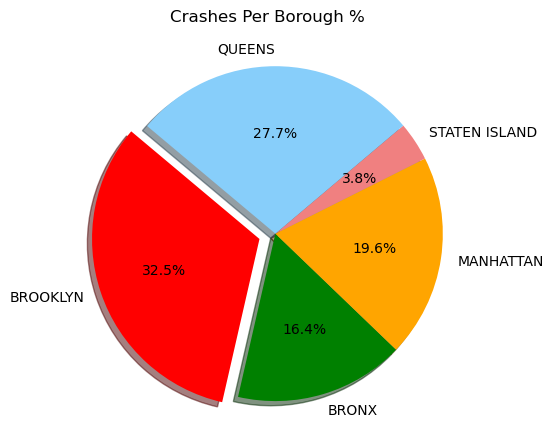

In [5]:
colors = ["red", "green", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(boroughs_df, explode=explode, labels=x_axis, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Crashes Per Borough %", pad=20)
plt.show()

In [6]:
fatality_df = crashes_df[crashes_df['NUMBER OF PERSONS KILLED']>0]

brooklyn_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'BROOKLYN']
brooklyn_ftl_count = brooklyn_ftl_df['BOROUGH'].count()

bronx_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'BRONX']
bronx_ftl_count = bronx_ftl_df['BOROUGH'].count()

manhattan_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'MANHATTAN']
manhattan_ftl_count = manhattan_ftl_df['BOROUGH'].count()

staten_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'STATEN ISLAND']
staten_ftl_count = staten_ftl_df['BOROUGH'].count()

queens_ftl_df = fatality_df[fatality_df['BOROUGH'] == 'QUEENS']
queens_ftl_count = queens_ftl_df['BOROUGH'].count()

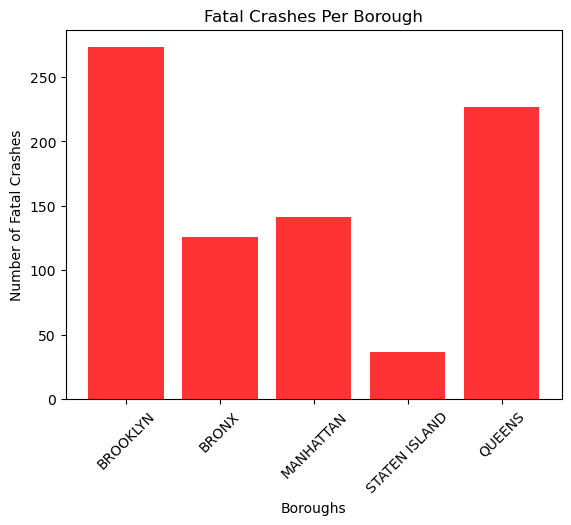

In [20]:
boroughs_ftl_df = [brooklyn_ftl_count, bronx_ftl_count, manhattan_ftl_count, staten_ftl_count, queens_ftl_count]
x_axis = ['BROOKLYN','BRONX','MANHATTAN','STATEN ISLAND','QUEENS']
y_axis = boroughs_ftl_df
plt.bar(x_axis, y_axis, color='r', alpha=0.8, align="center")
plt.xticks(rotation = 45)
plt.title("Fatal Crashes Per Borough")
plt.xlabel("Boroughs")
plt.ylabel("Number of Fatal Crashes")
plt.show()

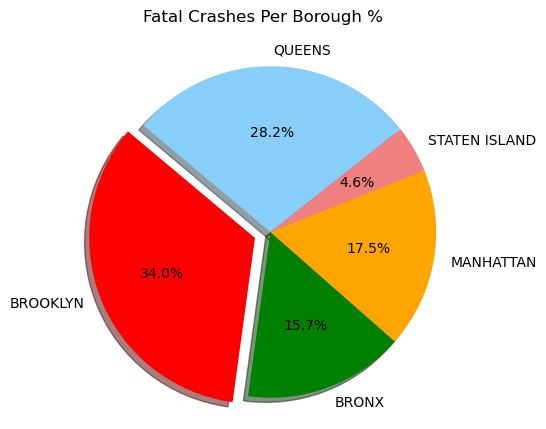

In [8]:
colors = ["red", "green", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(boroughs_ftl_df, explode=explode, labels=x_axis, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Fatal Crashes Per Borough %", pad=20)
plt.show()

In [9]:
crashes_df['NUMBER OF VEHICLES'] = crashes_df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']].count(axis=1)
crashes_df.drop(columns=['NUMBER OF PERSONS INJURED', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
crashes_df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES
0,9/11/2021,2:39,NaN,NaN,NaN,0.0,2
1,3/26/2022,11:45,NaN,NaN,NaN,0.0,1
2,6/29/2022,6:55,NaN,NaN,NaN,0.0,2
3,9/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,1
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0
...,...,...,...,...,...,...,...
1048570,9/8/2016,14:00,BRONX,40.820297,-73.854645,0.0,2
1048571,8/23/2016,16:55,NaN,40.692722,-73.968750,0.0,2
1048572,9/11/2016,14:45,NaN,40.733430,-73.868890,0.0,2
1048573,9/9/2016,17:00,NaN,40.770065,-73.959274,0.0,2


In [10]:
zero_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 0]
zero_count = zero_cars['NUMBER OF VEHICLES'].count()

one_car = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 1]
one_count = one_car['NUMBER OF VEHICLES'].count()

two_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 2]
two_count = two_cars['NUMBER OF VEHICLES'].count()

three_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 3]
three_count = three_cars['NUMBER OF VEHICLES'].count()

four_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 4]
four_count = four_cars['NUMBER OF VEHICLES'].count()

five_cars = crashes_df[crashes_df['NUMBER OF VEHICLES'] == 5]
five_count = five_cars['NUMBER OF VEHICLES'].count()


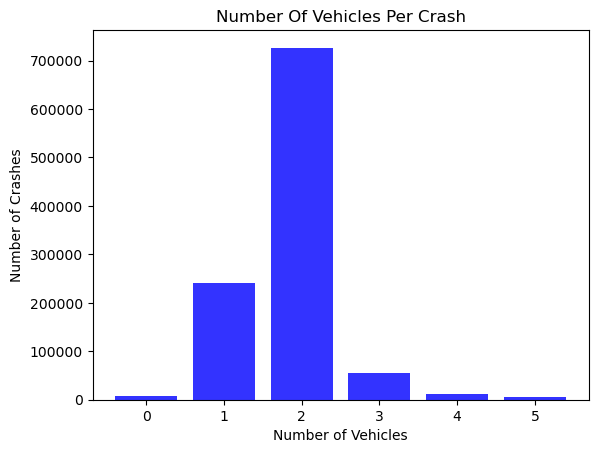

In [11]:
number_of_vehicles = [zero_count, one_count, two_count, three_count, four_count, five_count]
x_axis = ['0','1','2','3','4','5']
y_axis = number_of_vehicles
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align="center")
plt.title("Number Of Vehicles Per Crash")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Crashes")
plt.show()

In [12]:
crashes_df['MONTH'] = pd.DatetimeIndex(crashes_df['CRASH DATE']).month
crashes_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF VEHICLES,MONTH
0,9/11/2021,2:39,NaN,NaN,NaN,0.0,2,9
1,3/26/2022,11:45,NaN,NaN,NaN,0.0,1,3
2,6/29/2022,6:55,NaN,NaN,NaN,0.0,2,6
3,9/11/2021,9:35,BROOKLYN,40.667202,-73.866500,0.0,1,9
4,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,0.0,0,12


In [17]:
january = crashes_df[crashes_df['MONTH'] == 1]
jan = january['MONTH'].count()

febuary = crashes_df[crashes_df['MONTH'] == 2]
feb = febuary['MONTH'].count()

march = crashes_df[crashes_df['MONTH'] == 3]
mar = march['MONTH'].count()

april = crashes_df[crashes_df['MONTH'] == 4]
apr = april['MONTH'].count()

may_df = crashes_df[crashes_df['MONTH'] == 5]
may = may_df['MONTH'].count()

june = crashes_df[crashes_df['MONTH'] == 6]
jun = june['MONTH'].count()

july = crashes_df[crashes_df['MONTH'] == 7]
jul = july['MONTH'].count()

august = crashes_df[crashes_df['MONTH'] == 8]
aug = august['MONTH'].count()

september = crashes_df[crashes_df['MONTH'] == 9]
sep = september['MONTH'].count()

october = crashes_df[crashes_df['MONTH'] == 10]
octo = october['MONTH'].count()

november = crashes_df[crashes_df['MONTH'] == 11]
nov = november['MONTH'].count()

december = crashes_df[crashes_df['MONTH'] == 12]
dec = december['MONTH'].count()


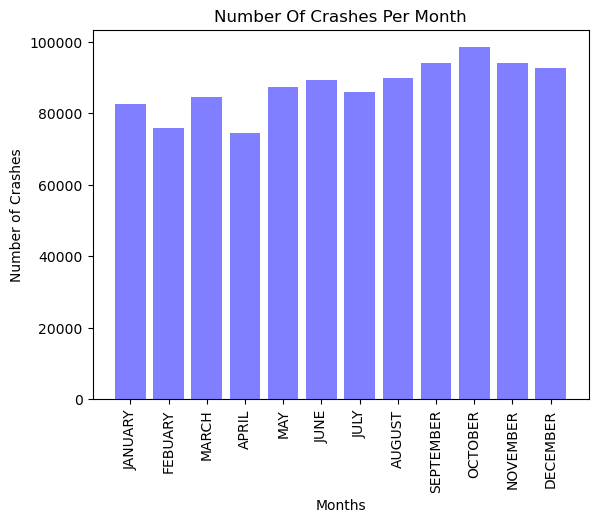

In [19]:
months = [jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec]
x_axis = ['JANUARY','FEBUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
y_axis = months
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation = 90)
plt.title("Number Of Crashes Per Month")
plt.xlabel("Months")
plt.ylabel("Number of Crashes")
plt.show()